In [2]:
# Standard scientific Python imports
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 72
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets

In [50]:
# The digits dataset for training
digits = datasets.load_digits()

# The data is made of 8x8 images of digits
# zip the image and label (dependent variable) together
images_and_labels = list(zip(digits.images, digits.target))

# print the type of the data
print(type(images_and_labels))
print(type(digits.images))
print(type(digits.target))


<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print(f'Number of images in the training set, N= {len(images_and_labels)}')


Number of images in the training set, N= 1797


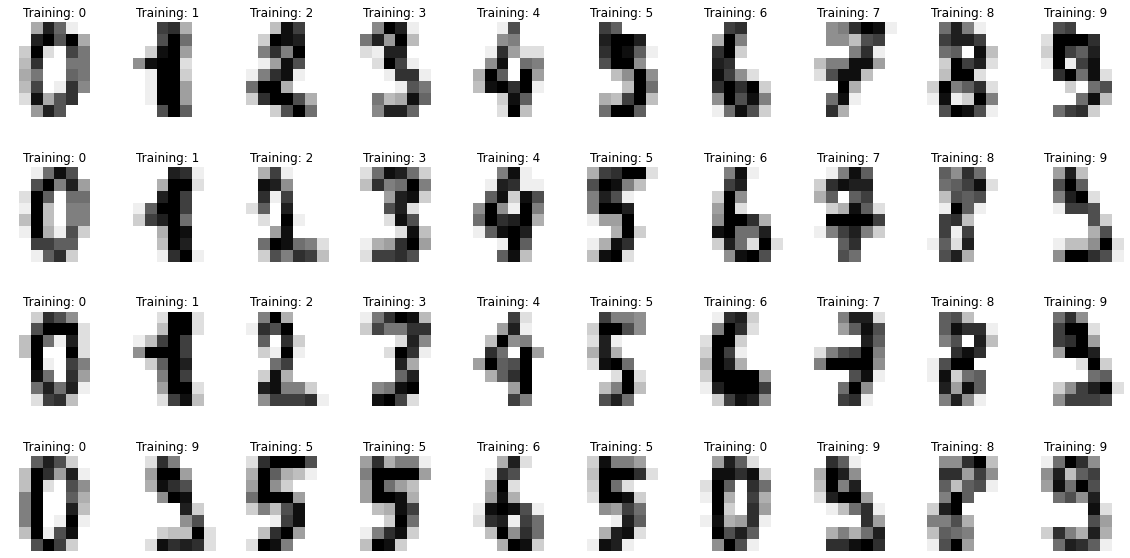

In [5]:
# Draw the first 40 data points - in this case a single data point is an image
plt.figure(1, figsize=(20, 10), dpi=72)
for index, (image, label) in enumerate(images_and_labels[:40]):
    plt.subplot(4, 10, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Training: {label}')

In [ ]:
# Check how the data looks like, examine the label as the last element, 1st data point, 2nd data point
print(images_and_labels[0])
print(images_and_labels[1])


(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), np.int64(0))
(array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]), np.int64(1))
<class 'list'>
<class 'tuple'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [7]:
# Check the size of the data structures, data vectors, examine the indices
print(len(images_and_labels))
print(len(images_and_labels[0]))
print(len(images_and_labels[0][0]))
print(len(images_and_labels[0][0][0]))

1797
2
8
8


In [8]:
# To apply a classifier on this data, we need to flatten the image
# Turn the data in a (samples, feature) matrix
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))

print(f'N={len(X)}, M={len(X[0])}')

N=1797, M=64


In [9]:
from sklearn import svm, metrics

# Create a classifier: a support vector classifier
# gamma is normally determined using a hyperparameter search which would need a validation dataset
classifier = svm.SVC(gamma=0.001)

# Learn the digits on the first half of the digits - 50% data is used as the training set
classifier.fit(X[:n_samples//2], digits.target[:n_samples//2])

# Predict the value of the digit on the second half
expected = digits.target[n_samples//2:]  # y-test vector
predicted = classifier.predict(X[n_samples//2:])  # y-predicted vector

In [10]:
%%time

acc = metrics.accuracy_score(expected, predicted)

print(f'Classification report for classifier {classifier}:\nAccuracy={acc:.3f}\n')

Classification report for classifier SVC(gamma=0.001):
Accuracy=0.969

CPU times: user 916 μs, sys: 674 μs, total: 1.59 ms
Wall time: 1.1 ms


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


<Axes: >

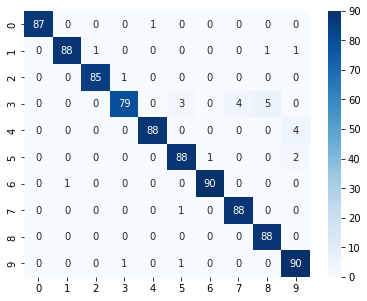

In [11]:
import seaborn as sns
print(f'Confusion matrix:\n{metrics.confusion_matrix(expected, predicted)}')

sns.heatmap(metrics.confusion_matrix(expected, predicted), annot=True, fmt='d', cmap='Blues')

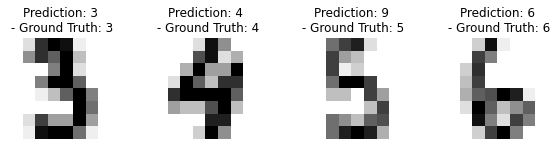

In [12]:
# Change the indices in images_and_predictions below to see more predictions
images_and_predictions = list(zip(digits.images[n_samples//2:], predicted))

plt.figure(1, figsize=(10, 4), dpi=72)
for index, (image, prediction) in enumerate(images_and_predictions[30:34]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Prediction: {prediction}\n - Ground Truth: {expected[index+30]}')

plt.show()

In [13]:
# Hyperparameter search
gamma_param = [1e-1, 1e-2, 1e-4, 1e-5]

Classifiers = [svm.SVC(gamma=param) for param in gamma_param]

training, training_labels = X[:n_samples//2], digits.target[:n_samples//2]
testing, testing_labels = X[n_samples//2:], digits.target[n_samples//2:]

for clf in Classifiers:
    clf.fit(training, training_labels)

predicteds = [clf.predict(testing) for clf in Classifiers]

for i, clf in enumerate(Classifiers):
    acc = metrics.accuracy_score(expected, predicteds[i])
    print(f'Model-{i} (g={gamma_param[i]:.0e}) Accuracy={acc:.3f}')

Model-0 (g=1e-01) Accuracy=0.101
Model-1 (g=1e-02) Accuracy=0.697
Model-2 (g=1e-04) Accuracy=0.940
Model-3 (g=1e-05) Accuracy=0.798


M=2 (PCA), Model-0 (g=1e-01) Acc=0.598
M=2 (PCA), Model-1 (g=1e-02) Acc=0.626
M=2 (PCA), Model-2 (g=1e-04) Acc=0.587
M=2 (PCA), Model-3 (g=1e-05) Acc=0.349


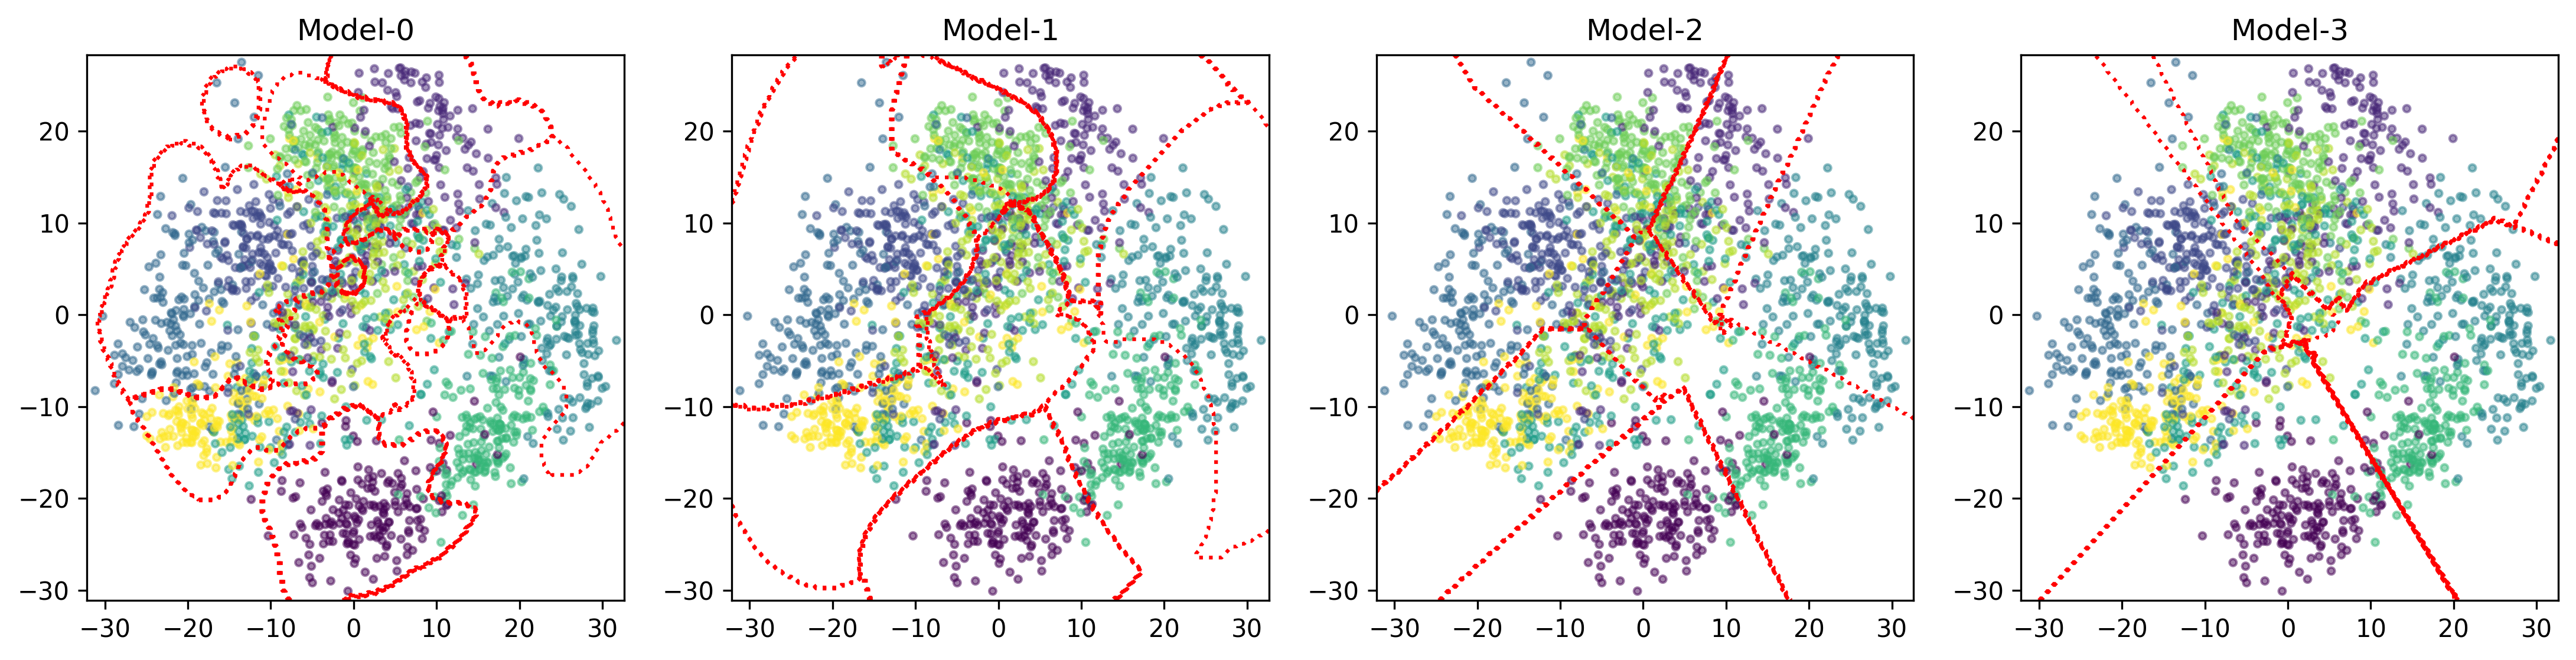

In [14]:
from sklearn.decomposition import PCA

# Visualize the models above in 2D
Xpca = PCA(n_components=2).fit_transform(X)

# train and test datasets and their labels
Xtr, ytr = Xpca[:Xpca.shape[0]//2], digits.target[:digits.target.shape[0]//2]
Xts, yts = Xpca[Xpca.shape[0]//2:], digits.target[digits.target.shape[0]//2:]

for clf in Classifiers:
    clf.fit(Xtr, ytr)

ypreds = [clf.predict(Xts) for clf in Classifiers]

for i, clf in enumerate(Classifiers):
    acc = metrics.accuracy_score(yts, ypreds[i])
    print(f'M=2 (PCA), Model-{i} (g={gamma_param[i]:.0e}) Acc={acc:.3f}')

h = 0.3  # mesh granularity of the plot

def plot_decisionboundary(_X, _clf, _h, color_db='r'):  # _h = step size in the mesh
    def get_minmax(_X, _m):  # _m = margin for visuals
        return _X[:,0].min()-_m, _X[:,0].max()+_m, _X[:,1].min()-_m, _X[:,1].max()+_m
    x1_min, x1_max, x2_min, x2_max = get_minmax(_X, 1)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, _h), np.arange(x2_min, x2_max, _h))
    ypred = _clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    plt.contour(xx1, xx2, ypred, colors=color_db, linestyles='dotted')
    
plt.figure(figsize=(18, 4), dpi=300)
for i, clf in enumerate(Classifiers):
    plt.subplot(1, 4, i+1)
    plt.scatter(Xpca[:,0], Xpca[:,1], s=8, c=digits.target.tolist(), alpha=0.5)
    plot_decisionboundary(Xpca, clf, h)
    plt.title(f'Model-{i}')


## Exercises
Exercise 1. Inspect the training data points indexed 100 and 101. What are their labels? Now repeat the same inspection on testing data points indexed 100 and 101. Explain the difference.

Exercise 2. Update the labels y vector to include only two of your choice and then update to filter out data points X except for these two labels. What is the classification performance on this new dataset?

Exercise 3. Study the scikit-learn API for the Multi-Layer Perceptron and apply it instead of the SVM. Can you match the SVM performance?

Exercise 4. Download PyCharm community version (ref: https://www.jetbrains.com/pycharm/download/#section=windows) and single-step the code above. Create a watch for the variable acc above. Then, run the program and observe changes.

Exercise 5. Research about methods finding the right gamma parameter above? Hyperparameter tuning?

In [15]:
# traning and testing data labels at index 100 and 101
print('='*10 + "Index 100" + '='*10)
print('training label: ', ytr[100])
print('testing label: ', yts[100])

print('='*10 + "Index 101" + '='*10)
print('training label: ', ytr[101])
print('testing label: ', yts[101])

==========Index 100==========
training label:  4
testing label:  4
==========Index 101==========
training label:  0
testing label:  3


### MLP Classifier

In [46]:
# Create a MLP classifier
from sklearn.neural_network import MLPClassifier

# Create a MLP classifier
mlp = MLPClassifier(max_iter=1000, alpha=0.0001,
                    solver='adam', random_state=21, tol=1e-4, activation="tanh")


mlp.fit(X[:n_samples//2], digits.target[:n_samples//2])

,hidden_layer_sizes,"(100,)"
,activation,'tanh'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,21


Now lets measure the performance of the model

In [47]:
# measure the performance of the model
expected = digits.target[n_samples//2:]  # y-test vector
predicted = mlp.predict(X[n_samples//2:])  # y-predicted vector

# print the accuracy of the model
print(f'Accuracy of the model: {metrics.accuracy_score(yts, predicted):.3f}')



Accuracy of the model: 0.940
